<a href="https://colab.research.google.com/github/lanyu0322/PUS2020_LYu/blob/master/FinalProject/%20Lan_light_crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Understanding the indicators of crime data is important since the increased crime rates year by year in certain cities in the United States. Except for the social indicators that are widely used as indicators to predict crime rates, streetlight has been a feature that used to prevent crime. Previous research has been implemented to examine the spatial association between streetlight density and the crime rate; machine learning algorithms have been increasingly used to understand crime patterns and predict future crime occurrences, which provided more credible evidence for researchers to optimize scarce public safety resources, such as improving streetlights in neighborhoods.


In terms of the research methods, the use of spatial analysis in crime analysis research is now common since it can help us clarify crime concerns with visual information. A key hypothesis behind spatial crime pattern analysis is that crime rates exhibit correlations with environmental settings

Nowadays, with the development of big data and machine learning, some researchers would like to use machine learning algorithms to understand crime patterns and predict future crime occurrences. Various machine learning techniques have been successfully applied in fraud detection, violent crime, traffic violence, and cybercrime. **Thus, the purpose of this research is using spatial analysis and machine learning tools to analyze the relationship between street lighting and the crimes. **


# **Important import**

In [350]:
!apt install python3-rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [351]:
!pip install geopandas
!pip install sodapy
!pip install census
!pip install CensusData

In [352]:
!pip install us

In [353]:
!pip install descartes

In [354]:

!pip install shapely


In [355]:
import geopandas as gpd


In [356]:
import pandas as pd
import numpy as np
import pylab as plt
from sodapy import Socrata


In [357]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Preparation**

Data:
All of the datasets in this research are publicly available. For the street lighting location data, it comes from Bureau of Street Lighting – City of Los Angeles. The L.A Neighborhood Boundaries data, crime data, and Demographics all come from the GeoHub, which is the City’s new public platform for visualizing and downloading Open Data. 


# light

In [358]:
# Streetlight locations within the City of Los Angeles
light = gpd.read_file("/content/drive/My Drive/pus2020_midterm_Lan/Streetlight locations/geo_export_595de76b-f3ad-470c-b7b6-4ca187060af5.shp")
light

,lampa,lampb,lampc,lampd,lampe,lampf,lastplan,postdesc,slid,status,stlid,geometry
0,55W LED,55W LED,None,None,None,None,SL7332,25' Ameron Rnd Conc Pole,198740.0,AsBuilt,SL5552-53,POINT (-118.47789 33.99161)
1,55W LED,55W LED,None,None,None,None,SL7332,25' Ameron Rnd Conc Pole,198741.0,AsBuilt,SL5552-54,POINT (-118.47805 33.99179)
2,55W LED,55W LED,None,None,None,None,SL7332,25' Ameron Rnd Conc Pole,198742.0,AsBuilt,SL5552-55,POINT (-118.47819 33.99195)
3,55W LED,55W LED,None,None,None,None,SL7332,25' Ameron Rnd Conc Pole,198743.0,AsBuilt,SL5552-56,POINT (-118.47832 33.99210)
4,55W LED,55W LED,None,None,None,None,SL7332,25' Ameron Rnd Conc Pole,198744.0,AsBuilt,SL5552-57,POINT (-118.47847 33.99228)
...,...,...,...,...,...,...,...,...,...,...,...,...
217634,107W LED,None,None,None,None,None,P38196,CD953C,237016.0,Energized,P38196-103,POINT (-118.28284 34.00567)
217635,107W LED,None,None,None,None,None,P38196,CD953C,237017.0,Energized,P38196-104,POINT (-118.28258 34.00534)
217636,107W LED,None,None,None,None,None,P38196,Cal Type 19-4-100,237019.0,Energized,P38196-78,POINT (-118.28259 34.00569)
217637,107W LED,None,None,None,None,None,P38196,Cal Type 17-3-100,237018.0,Energized,P38196-69,POINT (-118.28284 34.00531)


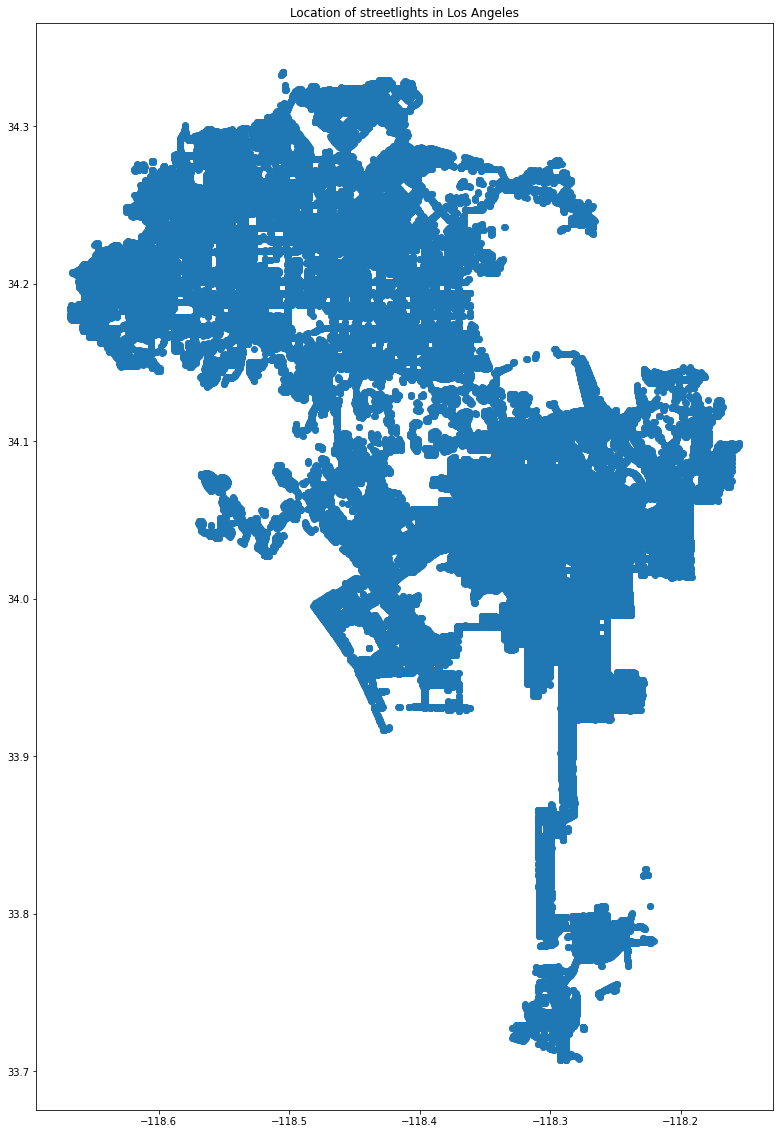

In [359]:
# plot it
f, ax = plt.subplots(1, figsize=(20, 20))
light.plot(ax = ax)
plt.title("Location of streetlights in Los Angeles");

In [360]:
# LA Times Neighborhood Boundaries
boro = gpd.read_file("https://opendata.arcgis.com/datasets/d6c55385a0e749519f238b77135eafac_0.geojson")
boro["name"].dropna

<bound method Series.dropna of 0             Adams-Normandie
1                      Arleta
2           Arlington Heights
3             Atwater Village
4      Baldwin Hills/Crenshaw
                ...          
109                Wilmington
110            Windsor Square
111                  Winnetka
112            Woodland Hills
113               Lake Balboa
Name: name, Length: 114, dtype: object>

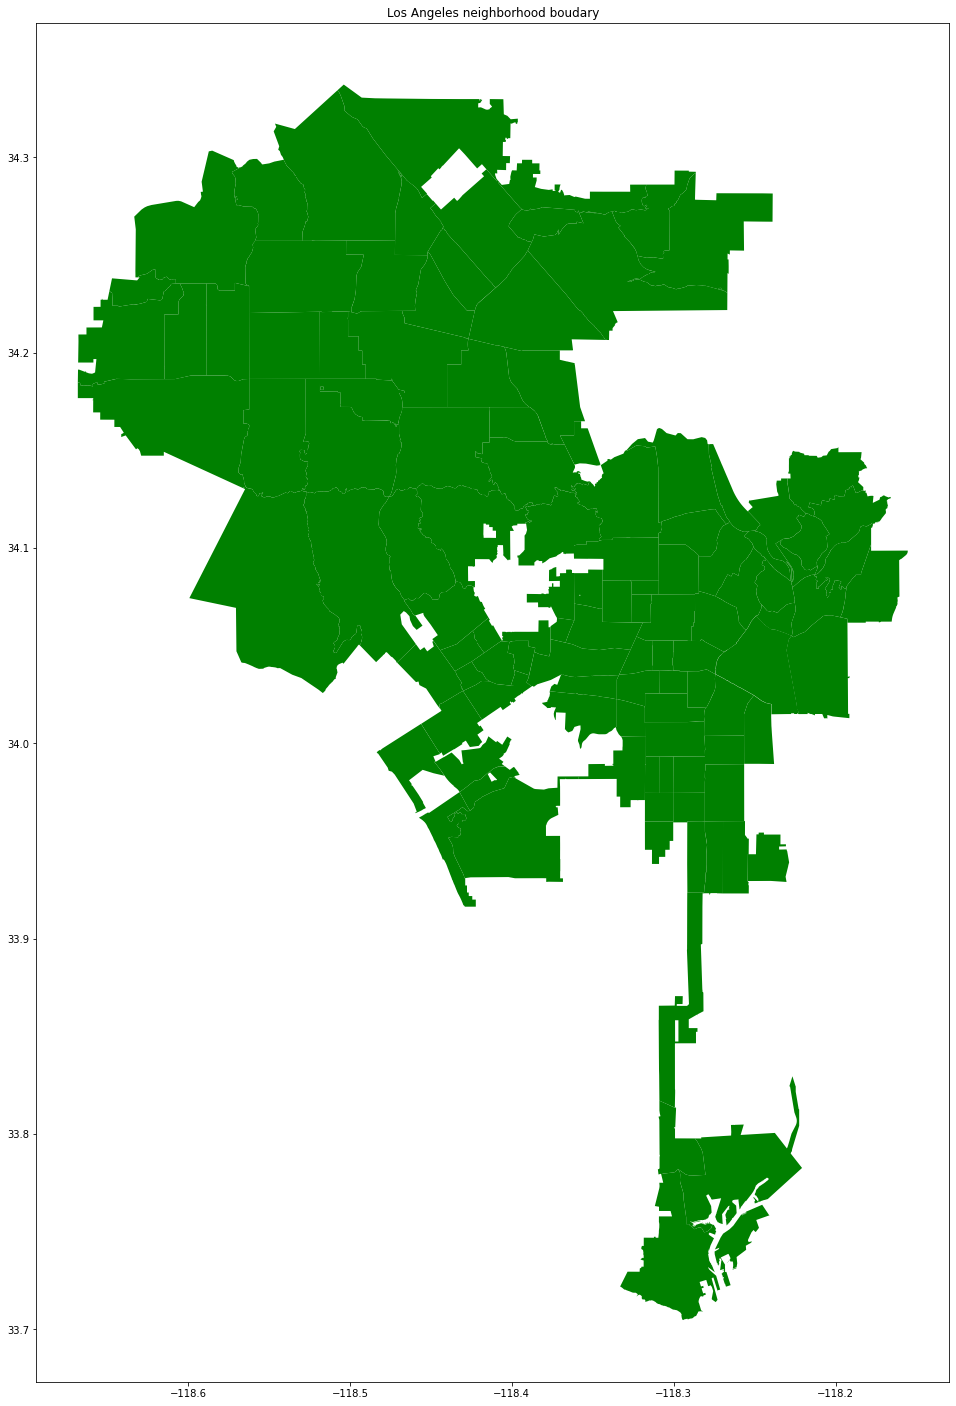

In [361]:
f, ax = plt.subplots(1, figsize=(25, 25))
boro.plot(ax = ax, color = "green")
plt.title("Los Angeles neighborhood boudary");

# crime

In [362]:
# Crime Data from 2010 to 2019
crime = pd.read_csv("https://data.lacity.org/resource/63jg-8b9z.csv")

In [363]:

# in place of application token, and no username or password:
client = Socrata("data.lacity.org", None)



#results = client.get("63jg-8b9z", where = "date_rptd > '2019-01-01T00:00:00.000'"'", limit = 20000 )

results = client.get("63jg-8b9z", where = "'2018-01-01T00:00:00.000'< date_rptd", limit = 300000)
                     

# Convert to pandas DataFrame

crime = pd.DataFrame.from_records(results)

In [364]:
# get 2018 crime data
crime2018 = crime[crime["date_rptd"] < '2019-01-01T00:00:00.000']
crime2018.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,vict_age,premis_cd,premis_desc,status,status_desc,crm_cd_1,location,lat,lon,mocodes,vict_sex,vict_descent,weapon_used_cd,weapon_desc,crm_cd_2,cross_street,crm_cd_3,crm_cd_4
0,181004044,2018-01-02T00:00:00.000,2018-01-01T00:00:00.000,1500,10,West Valley,1047,1,510,VEHICLE - STOLEN,0,101,STREET,IC,Invest Cont,510,16900 BURBANK BL,34.1722,-118.5011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,180104097,2018-01-02T00:00:00.000,2018-01-01T00:00:00.000,1430,01,Central,0153,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0,404,DEPARTMENT STORE,IC,Invest Cont,442,600 S BROADWAY,34.0467,-118.252,1803 0344,X,X,NaN,NaN,NaN,NaN,NaN,NaN
2,180704136,2018-01-02T00:00:00.000,2018-01-01T00:00:00.000,2200,07,Wilshire,0765,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),61,101,STREET,IC,Invest Cont,420,4800 DOCKWEILER ST,34.0513,-118.3398,0344 1606,F,W,NaN,NaN,NaN,NaN,NaN,NaN
3,180600510,2018-01-02T00:00:00.000,2018-01-01T00:00:00.000,0230,06,Hollywood,0645,1,820,ORAL COPULATION,23,501,SINGLE FAMILY DWELLING,IC,Invest Cont,820,6900 HOLLYWOOD BL,34.1016,-118.3401,0400 0500 0507 1402,F,O,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",998,NaN,NaN,NaN
4,180504095,2018-01-02T00:00:00.000,2018-01-02T00:00:00.000,0700,05,Harbor,0501,1,330,BURGLARY FROM VEHICLE,32,101,STREET,IC,Invest Cont,330,1200 W 185TH ST,33.8627,-118.2942,1300 0344,F,H,NaN,NaN,NaN,NaN,NaN,NaN


# population

In [365]:
# download population data from census
myAPIkey =  pd.read_csv("/content/drive/My Drive/myapis.csv")["census"]


In [366]:
import censusdata
from census import Census
from us import states
c = Census(myAPIkey)


In [367]:
censusdata.search('acs5', 2018, 'concept', 'population')

[('B00001_001E',
  'UNWEIGHTED SAMPLE COUNT OF THE POPULATION',
  'Estimate!!Total'),
 ('B01003_001E', 'TOTAL POPULATION', 'Estimate!!Total'),
 ('B05006PR_001E',
  'PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION IN PUERTO RICO',
  'Estimate!!Total'),
 ('B05006PR_002E',
  'PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION IN PUERTO RICO',
  'Estimate!!Total!!Europe'),
 ('B05006PR_003E',
  'PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION IN PUERTO RICO',
  'Estimate!!Total!!Europe!!Northern Europe'),
 ('B05006PR_004E',
  'PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION IN PUERTO RICO',
  'Estimate!!Total!!Europe!!Western Europe'),
 ('B05006PR_005E',
  'PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION IN PUERTO RICO',
  'Estimate!!Total!!Europe!!Southern Europe'),
 ('B05006PR_006E',
  'PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION IN PUERTO RICO',
  'Estimate!!Total!!Europe!!Southern Europe!!Spain'),
 ('B05006PR_007E',
  'PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION IN PUERTO RICO',
  'Estima

In [368]:
censusdata.printtable(censusdata.censustable('acs5', 2018, 'B01003'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B01003_001E  | TOTAL POPULATION               | !! Estimate Total                                        | int  
-------------------------------------------------------------------------------------------------------------------


In [369]:
pop = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '06'), 
                                                                  ('county', '037'), ('tract', '*')]),  ["B01003_001E"])

In [370]:
pop

,B01003_001E
"Census Tract 5433.21, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:543321",5619
"Census Tract 5435.02, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:543502",4424
"Census Tract 5501, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:550100",7441
"Census Tract 5505, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:550500",8192
"Census Tract 5510, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:551000",7311
...,...
"Census Tract 6040.01, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:604001",4600
"Census Tract 6040.02, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:604002",4886
"Census Tract 6203.05, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:620305",5876
"Census Tract 6209.04, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:620904",2900


In [371]:
def gettract(cname):
  return cname.split(':')[-1]

In [372]:
pop["tract"] = pop.index.astype(str).map(gettract)

In [373]:
pop

,B01003_001E,tract
"Census Tract 5433.21, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:543321",5619,543321
"Census Tract 5435.02, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:543502",4424,543502
"Census Tract 5501, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:550100",7441,550100
"Census Tract 5505, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:550500",8192,550500
"Census Tract 5510, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:551000",7311,551000
...,...,...
"Census Tract 6040.01, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:604001",4600,604001
"Census Tract 6040.02, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:604002",4886,604002
"Census Tract 6203.05, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:620305",5876,620305
"Census Tract 6209.04, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:620904",2900,620904


# education

In [374]:
# download education data from census
censusdata.search('acs5', 2018, 'concept', 'education')

[('B06009PR_001E',
  'PLACE OF BIRTH BY EDUCATIONAL ATTAINMENT IN PUERTO RICO',
  'Estimate!!Total'),
 ('B06009PR_002E',
  'PLACE OF BIRTH BY EDUCATIONAL ATTAINMENT IN PUERTO RICO',
  'Estimate!!Total!!Less than high school graduate'),
 ('B06009PR_003E',
  'PLACE OF BIRTH BY EDUCATIONAL ATTAINMENT IN PUERTO RICO',
  'Estimate!!Total!!High school graduate (includes equivalency)'),
 ('B06009PR_004E',
  'PLACE OF BIRTH BY EDUCATIONAL ATTAINMENT IN PUERTO RICO',
  "Estimate!!Total!!Some college or associate's degree"),
 ('B06009PR_005E',
  'PLACE OF BIRTH BY EDUCATIONAL ATTAINMENT IN PUERTO RICO',
  "Estimate!!Total!!Bachelor's degree"),
 ('B06009PR_006E',
  'PLACE OF BIRTH BY EDUCATIONAL ATTAINMENT IN PUERTO RICO',
  'Estimate!!Total!!Graduate or professional degree'),
 ('B06009PR_007E',
  'PLACE OF BIRTH BY EDUCATIONAL ATTAINMENT IN PUERTO RICO',
  'Estimate!!Total!!Born in Puerto Rico'),
 ('B06009PR_008E',
  'PLACE OF BIRTH BY EDUCATIONAL ATTAINMENT IN PUERTO RICO',
  'Estimate!!Total!!

In [375]:
censusdata.printtable(censusdata.censustable('acs5', 2018, 'B15003'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B15003_001E  | EDUCATIONAL ATTAINMENT FOR THE | !! Estimate Total                                        | int  
B15003_002E  | EDUCATIONAL ATTAINMENT FOR THE | !! !! Estimate Total No schooling completed              | int  
B15003_003E  | EDUCATIONAL ATTAINMENT FOR THE | !! !! Estimate Total Nursery school                      | int  
B15003_004E  | EDUCATIONAL ATTAINMENT FOR THE | !! !! Estimate Total Kindergarten                        | int  
B15003_005E  | EDUCATIONAL ATTAINMENT FOR THE | !! !! Estimate Total 1st grade                           | int  
B15003_006E  | EDUCATIONAL ATTAINMENT FOR THE | !! !! Estimate Total 2nd grade                           | int  
B15003_007E  | EDUCATIONAL ATTAINMENT FOR THE | !! !! Estimate Total 3rd grade               

In [376]:
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2018)

{'Alabama': censusgeo((('state', '01'),)),
 'Alaska': censusgeo((('state', '02'),)),
 'Arizona': censusgeo((('state', '04'),)),
 'Arkansas': censusgeo((('state', '05'),)),
 'California': censusgeo((('state', '06'),)),
 'Colorado': censusgeo((('state', '08'),)),
 'Connecticut': censusgeo((('state', '09'),)),
 'Delaware': censusgeo((('state', '10'),)),
 'District of Columbia': censusgeo((('state', '11'),)),
 'Florida': censusgeo((('state', '12'),)),
 'Georgia': censusgeo((('state', '13'),)),
 'Hawaii': censusgeo((('state', '15'),)),
 'Idaho': censusgeo((('state', '16'),)),
 'Illinois': censusgeo((('state', '17'),)),
 'Indiana': censusgeo((('state', '18'),)),
 'Iowa': censusgeo((('state', '19'),)),
 'Kansas': censusgeo((('state', '20'),)),
 'Kentucky': censusgeo((('state', '21'),)),
 'Louisiana': censusgeo((('state', '22'),)),
 'Maine': censusgeo((('state', '23'),)),
 'Maryland': censusgeo((('state', '24'),)),
 'Massachusetts': censusgeo((('state', '25'),)),
 'Michigan': censusgeo((('stat

In [377]:
# only download data that education level higher than college
education022 = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '06'), 
                                                                  ('county', '037'), ('tract', '*')]),  ["B15003_022E"])
education023 = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '06'), 
                                                                  ('county', '037'), ('tract', '*')]),  ["B15003_023E"])
education024 = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '06'), 
                                                                  ('county', '037'), ('tract', '*')]),  ["B15003_024E"])
education025 = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '06'), 
                                                                  ('county', '037'), ('tract', '*')]),  ["B15003_025E"])

In [378]:
# merge them together
education_college = education022.merge(education023, left_on=education022.index, right_on=education023.index)
education = education024.merge(education025, left_on=education024.index, right_on=education025.index)
education_all = education_college.merge(education, left_on=education_college.index, right_on=education.index)


In [379]:
# education all includes total number of people with college or higher education level
education_all["total"] = education_all["B15003_022E"]+education_all["B15003_023E"]+education_all["B15003_024E"]+education_all["B15003_025E"]

In [380]:
education_all

,key_0,key_0_x,B15003_022E,B15003_023E,key_0_y,B15003_024E,B15003_025E,total
0,0,"Census Tract 5433.21, Los Angeles County, Cali...",644,629,"Census Tract 5433.21, Los Angeles County, Cali...",63,65,1401
1,1,"Census Tract 5435.02, Los Angeles County, Cali...",570,157,"Census Tract 5435.02, Los Angeles County, Cali...",36,0,763
2,2,"Census Tract 5501, Los Angeles County, Califor...",708,266,"Census Tract 5501, Los Angeles County, Califor...",17,38,1029
3,3,"Census Tract 5505, Los Angeles County, Califor...",1038,490,"Census Tract 5505, Los Angeles County, Califor...",80,0,1608
4,4,"Census Tract 5510, Los Angeles County, Califor...",917,403,"Census Tract 5510, Los Angeles County, Califor...",108,0,1428
...,...,...,...,...,...,...,...,...
2341,2341,"Census Tract 6040.01, Los Angeles County, Cali...",420,127,"Census Tract 6040.01, Los Angeles County, Cali...",21,0,568
2342,2342,"Census Tract 6040.02, Los Angeles County, Cali...",517,175,"Census Tract 6040.02, Los Angeles County, Cali...",34,0,726
2343,2343,"Census Tract 6203.05, Los Angeles County, Cali...",1969,814,"Census Tract 6203.05, Los Angeles County, Cali...",337,131,3251
2344,2344,"Census Tract 6209.04, Los Angeles County, Cali...",864,538,"Census Tract 6209.04, Los Angeles County, Cali...",209,55,1666


In [381]:
# get the census tract id
education_all["tract"] = education_all["key_0_x"].astype(str).map(gettract)


In [382]:
education_all

,key_0,key_0_x,B15003_022E,B15003_023E,key_0_y,B15003_024E,B15003_025E,total,tract
0,0,"Census Tract 5433.21, Los Angeles County, Cali...",644,629,"Census Tract 5433.21, Los Angeles County, Cali...",63,65,1401,543321
1,1,"Census Tract 5435.02, Los Angeles County, Cali...",570,157,"Census Tract 5435.02, Los Angeles County, Cali...",36,0,763,543502
2,2,"Census Tract 5501, Los Angeles County, Califor...",708,266,"Census Tract 5501, Los Angeles County, Califor...",17,38,1029,550100
3,3,"Census Tract 5505, Los Angeles County, Califor...",1038,490,"Census Tract 5505, Los Angeles County, Califor...",80,0,1608,550500
4,4,"Census Tract 5510, Los Angeles County, Califor...",917,403,"Census Tract 5510, Los Angeles County, Califor...",108,0,1428,551000
...,...,...,...,...,...,...,...,...,...
2341,2341,"Census Tract 6040.01, Los Angeles County, Cali...",420,127,"Census Tract 6040.01, Los Angeles County, Cali...",21,0,568,604001
2342,2342,"Census Tract 6040.02, Los Angeles County, Cali...",517,175,"Census Tract 6040.02, Los Angeles County, Cali...",34,0,726,604002
2343,2343,"Census Tract 6203.05, Los Angeles County, Cali...",1969,814,"Census Tract 6203.05, Los Angeles County, Cali...",337,131,3251,620305
2344,2344,"Census Tract 6209.04, Los Angeles County, Cali...",864,538,"Census Tract 6209.04, Los Angeles County, Cali...",209,55,1666,620904


In [383]:
# rename it
education_all["edu"] = education_all["total"]

In [384]:
# clean the dataframe
education_all = education_all[["edu", "tract"]]
education_all

,edu,tract
0,1401,543321
1,763,543502
2,1029,550100
3,1608,550500
4,1428,551000
...,...,...
2341,568,604001
2342,726,604002
2343,3251,620305
2344,1666,620904


# census tract LA geodataframe

In [385]:
# download and unzip census tract geo data
!wget https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_06_tract.zip

--2020-12-18 09:06:27--  https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_06_tract.zip
Resolving www2.census.gov (www2.census.gov)... 23.43.187.141, 2600:1406:c800:488::208c, 2600:1406:c800:48c::208c
Connecting to www2.census.gov (www2.census.gov)|23.43.187.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘tl_2018_06_tract.zip.3’

tl_2018_06_tract.zi     [  <=>               ]  27.97M  74.6MB/s    in 0.4s    

2020-12-18 09:06:27 (74.6 MB/s) - ‘tl_2018_06_tract.zip.3’ saved [29332752]



In [386]:
# unzip census tract geo data
!unzip tl_2018_06_tract.zip

Archive:  tl_2018_06_tract.zip
replace tl_2018_06_tract.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: tl_2018_06_tract.cpg    
  inflating: tl_2018_06_tract.dbf    
  inflating: tl_2018_06_tract.prj    
  inflating: tl_2018_06_tract.shp    
  inflating: tl_2018_06_tract.shp.ea.iso.xml  
  inflating: tl_2018_06_tract.shp.iso.xml  
  inflating: tl_2018_06_tract.shx    


In [387]:
# read los angelas geo data
gla18 = gpd.GeoDataFrame.from_file("tl_2018_06_tract.shp")

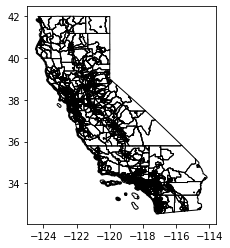

In [388]:
# plot it
gla18.plot(color="None", edgecolor='k')

In [389]:
gla18.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,037,137504,06037137504,1375.04,Census Tract 1375.04,G5020,S,3837562,0,+34.1480383,-118.5720594,"POLYGON ((-118.58119 34.14318, -118.58099 34.1..."
1,06,037,138000,06037138000,1380,Census Tract 1380,G5020,S,4472196,0,+34.1488008,-118.5910495,"POLYGON ((-118.60573 34.14585, -118.60561 34.1..."
2,06,037,139200,06037139200,1392,Census Tract 1392,G5020,S,1152031,0,+34.1756961,-118.5246447,"POLYGON ((-118.53082 34.18024, -118.52952 34.1..."
3,06,067,002300,06067002300,23,Census Tract 23,G5020,S,1213095,0,+38.5571708,-121.4938311,"POLYGON ((-121.50218 38.55643, -121.50184 38.5..."
4,06,067,002400,06067002400,24,Census Tract 24,G5020,S,3224718,0,+38.5448312,-121.4973382,"POLYGON ((-121.50970 38.54070, -121.50960 38.5..."


In [390]:
# merge los angeles census tract data with eduation data
egla18 = gla18.merge(education_all, left_on = "TRACTCE", right_on = "tract")


In [391]:
egla18 

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,edu,tract
0,06,037,137504,06037137504,1375.04,Census Tract 1375.04,G5020,S,3837562,0,+34.1480383,-118.5720594,"POLYGON ((-118.58119 34.14318, -118.58099 34.1...",844,137504
1,06,037,138000,06037138000,1380,Census Tract 1380,G5020,S,4472196,0,+34.1488008,-118.5910495,"POLYGON ((-118.60573 34.14585, -118.60561 34.1...",2026,138000
2,06,037,139200,06037139200,1392,Census Tract 1392,G5020,S,1152031,0,+34.1756961,-118.5246447,"POLYGON ((-118.53082 34.18024, -118.52952 34.1...",1843,139200
3,06,037,143200,06037143200,1432,Census Tract 1432,G5020,S,957093,0,+34.1494399,-118.3720618,"POLYGON ((-118.37899 34.15409, -118.37888 34.1...",1822,143200
4,06,037,143300,06037143300,1433,Census Tract 1433,G5020,S,1649223,5619,+34.1521830,-118.3866139,"POLYGON ((-118.39648 34.15761, -118.39538 34.1...",2831,143300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,06,037,910805,06037910805,9108.05,Census Tract 9108.05,G5020,S,110063439,87717,+34.4705186,-118.2228302,"POLYGON ((-118.33990 34.43616, -118.33925 34.4...",1048,910805
2454,06,037,189600,06037189600,1896,Census Tract 1896,G5020,S,1082948,0,+34.1113467,-118.3297772,"POLYGON ((-118.33698 34.10837, -118.33694 34.1...",1981,189600
2455,06,037,189400,06037189400,1894,Census Tract 1894,G5020,S,1446823,0,+34.1200812,-118.3211428,"POLYGON ((-118.32676 34.11112, -118.32674 34.1...",2025,189400
2456,06,037,430724,06037430724,4307.24,Census Tract 4307.24,G5020,S,579901,0,+34.1270540,-118.0591184,"POLYGON ((-118.06770 34.12431, -118.06772 34.1...",1780,430724


In [392]:
# only keep needed variables
geo_edu = egla18[["edu", "tract", "GEOID", "geometry"]]
geo_edu

,edu,tract,GEOID,geometry
0,844,137504,06037137504,"POLYGON ((-118.58119 34.14318, -118.58099 34.1..."
1,2026,138000,06037138000,"POLYGON ((-118.60573 34.14585, -118.60561 34.1..."
2,1843,139200,06037139200,"POLYGON ((-118.53082 34.18024, -118.52952 34.1..."
3,1822,143200,06037143200,"POLYGON ((-118.37899 34.15409, -118.37888 34.1..."
4,2831,143300,06037143300,"POLYGON ((-118.39648 34.15761, -118.39538 34.1..."
...,...,...,...,...
2453,1048,910805,06037910805,"POLYGON ((-118.33990 34.43616, -118.33925 34.4..."
2454,1981,189600,06037189600,"POLYGON ((-118.33698 34.10837, -118.33694 34.1..."
2455,2025,189400,06037189400,"POLYGON ((-118.32676 34.11112, -118.32674 34.1..."
2456,1780,430724,06037430724,"POLYGON ((-118.06770 34.12431, -118.06772 34.1..."


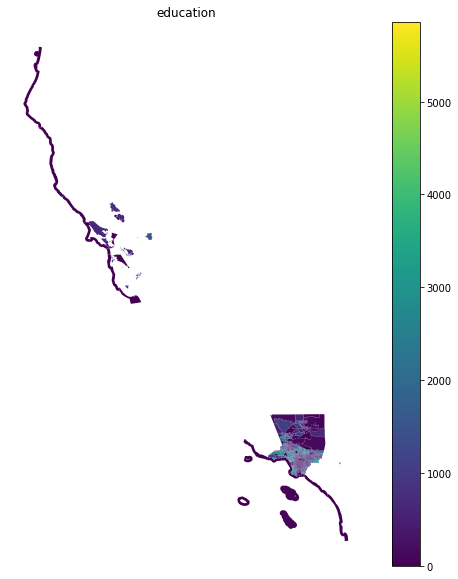

In [393]:
# plot it
fig, ax = plt.subplots(figsize=[10, 10])
egla18.plot(column="edu", 
               ax=ax, legend=True);
ax.axis('off');
plt.title("education");

# income

In [394]:
# get 
censusdata.search('acs5', 2018, 'concept', 'income')

[('B05010_001E',
  'RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY NATIVITY OF CHILDREN UNDER 18 YEARS IN FAMILIES AND SUBFAMILIES BY LIVING ARRANGEMENTS AND NATIVITY OF PARENTS',
  'Estimate!!Total'),
 ('B05010_002E',
  'RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY NATIVITY OF CHILDREN UNDER 18 YEARS IN FAMILIES AND SUBFAMILIES BY LIVING ARRANGEMENTS AND NATIVITY OF PARENTS',
  'Estimate!!Total!!Under 1.00'),
 ('B05010_003E',
  'RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY NATIVITY OF CHILDREN UNDER 18 YEARS IN FAMILIES AND SUBFAMILIES BY LIVING ARRANGEMENTS AND NATIVITY OF PARENTS',
  'Estimate!!Total!!Under 1.00!!Living with two parents'),
 ('B05010_004E',
  'RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY NATIVITY OF CHILDREN UNDER 18 YEARS IN FAMILIES AND SUBFAMILIES BY LIVING ARRANGEMENTS AND NATIVITY OF PARENTS',
  'Estimate!!Total!!Under 1.00!!Living with two parents!!Both parents native'),
 ('B05010_005E',
  'RATIO OF INCOME TO PO

In [395]:
censusdata.printtable(censusdata.censustable('acs5', 2018, 'B19013'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B19013_001E  | MEDIAN HOUSEHOLD INCOME IN THE | !! Estimate Median household income in the past 12 month | int  
-------------------------------------------------------------------------------------------------------------------


In [396]:
# subset to LA data
income = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '06'), 
                                                                  ('county', '037'), ('tract', '*')]),  ["B19013_001E"])

In [397]:
# get tract data
income["tract"] = income.index.astype(str).map(gettract)

In [398]:
income

,B19013_001E,tract
"Census Tract 5433.21, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:543321",85465,543321
"Census Tract 5435.02, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:543502",63582,543502
"Census Tract 5501, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:550100",71133,550100
"Census Tract 5505, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:550500",84315,550500
"Census Tract 5510, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:551000",86068,551000
...,...,...
"Census Tract 6040.01, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:604001",67823,604001
"Census Tract 6040.02, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:604002",60274,604002
"Census Tract 6203.05, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:620305",127632,620305
"Census Tract 6209.04, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:620904",177632,620904


In [399]:
# merge it with geodataframe
incomela18 = gla18.merge(income, left_on = "TRACTCE", right_on = "tract")


In [400]:
# rename the columns
incomela18["logincome"] = np.log(incomela18["B19013_001E"])
incomela18.rename(columns={"B19013_001E": "income"})
incomela18.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry',
       'B19013_001E', 'tract', 'logincome'],
      dtype='object')

In [401]:
# only leave usefule columns 
geo_income = incomela18[[ "GEOID", "logincome", "tract", "B19013_001E"]]

In [402]:
# merge with population data
geoincome = geo_income.merge(pop, left_on="tract", right_on="tract")
geoincome

,GEOID,logincome,tract,B19013_001E,B01003_001E
0,06037137504,11.973510,137504,158500,2073
1,06037138000,11.759989,138000,128026,4673
2,06037139200,11.118697,139200,67420,5840
3,06037143200,11.212671,143200,74063,4210
4,06037143300,11.375099,143300,87125,6730
...,...,...,...,...,...
2453,06037910805,11.622838,910805,111618,4687
2454,06037189600,11.157806,189600,70109,3787
2455,06037189400,11.980482,189400,159609,3247
2456,06037430724,10.912686,430724,54868,4836


In [403]:
# rename columns
geoincome["income"] = geoincome["B19013_001E"]
geoincome["population"] = geoincome["B01003_001E"]
geoincome

,GEOID,logincome,tract,B19013_001E,B01003_001E,income,population
0,06037137504,11.973510,137504,158500,2073,158500,2073
1,06037138000,11.759989,138000,128026,4673,128026,4673
2,06037139200,11.118697,139200,67420,5840,67420,5840
3,06037143200,11.212671,143200,74063,4210,74063,4210
4,06037143300,11.375099,143300,87125,6730,87125,6730
...,...,...,...,...,...,...,...
2453,06037910805,11.622838,910805,111618,4687,111618,4687
2454,06037189600,11.157806,189600,70109,3787,70109,3787
2455,06037189400,11.980482,189400,159609,3247,159609,3247
2456,06037430724,10.912686,430724,54868,4836,54868,4836


In [404]:
# merge all data together
vari = geo_edu.merge(geoincome, left_on="GEOID", right_on="GEOID")
vari = vari[["edu", "GEOID", "geometry", "logincome", "income", "population"]]
vari

,edu,GEOID,geometry,logincome,income,population
0,844,06037137504,"POLYGON ((-118.58119 34.14318, -118.58099 34.1...",11.973510,158500,2073
1,2026,06037138000,"POLYGON ((-118.60573 34.14585, -118.60561 34.1...",11.759989,128026,4673
2,1843,06037139200,"POLYGON ((-118.53082 34.18024, -118.52952 34.1...",11.118697,67420,5840
3,1822,06037143200,"POLYGON ((-118.37899 34.15409, -118.37888 34.1...",11.212671,74063,4210
4,2831,06037143300,"POLYGON ((-118.39648 34.15761, -118.39538 34.1...",11.375099,87125,6730
...,...,...,...,...,...,...
2453,1048,06037910805,"POLYGON ((-118.33990 34.43616, -118.33925 34.4...",11.622838,111618,4687
2454,1981,06037189600,"POLYGON ((-118.33698 34.10837, -118.33694 34.1...",11.157806,70109,3787
2455,2025,06037189400,"POLYGON ((-118.32676 34.11112, -118.32674 34.1...",11.980482,159609,3247
2456,1780,06037430724,"POLYGON ((-118.06770 34.12431, -118.06772 34.1...",10.912686,54868,4836


In [405]:
# get the population density column
geometry = vari.geometry.to_crs(epsg=6423)
area = geometry.area
vari["popdensity"] = vari["population"]/area

In [406]:
# drop null value
vari = vari.dropna()
vari

,edu,GEOID,geometry,logincome,income,population,popdensity
0,844,06037137504,"POLYGON ((-118.58119 34.14318, -118.58099 34.1...",11.973510,158500,2073,0.000540
1,2026,06037138000,"POLYGON ((-118.60573 34.14585, -118.60561 34.1...",11.759989,128026,4673,0.001045
2,1843,06037139200,"POLYGON ((-118.53082 34.18024, -118.52952 34.1...",11.118697,67420,5840,0.005070
3,1822,06037143200,"POLYGON ((-118.37899 34.15409, -118.37888 34.1...",11.212671,74063,4210,0.004399
4,2831,06037143300,"POLYGON ((-118.39648 34.15761, -118.39538 34.1...",11.375099,87125,6730,0.004067
...,...,...,...,...,...,...,...
2453,1048,06037910805,"POLYGON ((-118.33990 34.43616, -118.33925 34.4...",11.622838,111618,4687,0.000043
2454,1981,06037189600,"POLYGON ((-118.33698 34.10837, -118.33694 34.1...",11.157806,70109,3787,0.003497
2455,2025,06037189400,"POLYGON ((-118.32676 34.11112, -118.32674 34.1...",11.980482,159609,3247,0.002244
2456,1780,06037430724,"POLYGON ((-118.06770 34.12431, -118.06772 34.1...",10.912686,54868,4836,0.008340


# **using intersection to get the number of crimes and lights for each tract **

In [407]:
# change geometry to the CRS
light_ft = light.to_crs(epsg=6423)
vari_ft = vari.to_crs(epsg=6423)

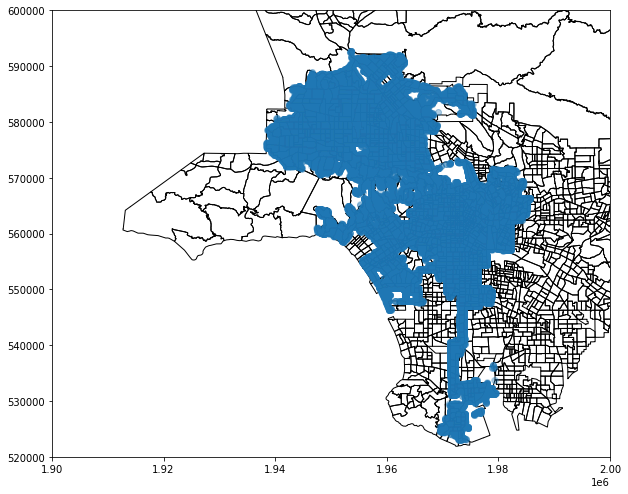

In [408]:
# plot the intersection for the light and census tract 
ax=vari_ft.plot(color = 'None', edgecolor = 'k', figsize=(10, 10))
ax.set_xlim(1.9e6, 2.0e6)
ax.set_ylim(0.52e6, 0.6e6)
light_ft.plot(ax = ax, alpha=0.2)

In [409]:
vari.head()

,edu,GEOID,geometry,logincome,income,population,popdensity
0,844,06037137504,"POLYGON ((-118.58119 34.14318, -118.58099 34.1...",11.973510,158500,2073,0.000540
1,2026,06037138000,"POLYGON ((-118.60573 34.14585, -118.60561 34.1...",11.759989,128026,4673,0.001045
2,1843,06037139200,"POLYGON ((-118.53082 34.18024, -118.52952 34.1...",11.118697,67420,5840,0.005070
3,1822,06037143200,"POLYGON ((-118.37899 34.15409, -118.37888 34.1...",11.212671,74063,4210,0.004399
4,2831,06037143300,"POLYGON ((-118.39648 34.15761, -118.39538 34.1...",11.375099,87125,6730,0.004067


In [410]:
# import sjoin
from geopandas.tools import sjoin

In [411]:
# implement geojoin in order to get the number of the light for each tract 
join = gpd.sjoin(vari_ft, light_ft)

In [412]:
# groupby and get the number of lights for each tract 
lightcount = join.groupby("GEOID").count().reset_index()
lightcount = lightcount[["GEOID", "geometry"]]
lightcount = lightcount.rename(index=str, columns={"GEOID": "geoid", "geometry": "lightcount"})
lightcount


,geoid,lightcount
0,06037101110,39
1,06037101122,143
2,06037101210,98
3,06037101220,36
4,06037101300,160
...,...,...
1074,06037920303,14
1075,06037980015,106
1076,06037980019,18
1077,06037980024,274


In [413]:
# clear the dataframe 
vari = vari.merge(lightcount, left_on= 'GEOID', right_on= 'geoid')
vari = vari.drop(["geoid"], axis=1)
vari

,edu,GEOID,geometry,logincome,income,population,popdensity,lightcount
0,844,06037137504,"POLYGON ((-118.58119 34.14318, -118.58099 34.1...",11.973510,158500,2073,0.000540,167
1,2026,06037138000,"POLYGON ((-118.60573 34.14585, -118.60561 34.1...",11.759989,128026,4673,0.001045,99
2,1843,06037139200,"POLYGON ((-118.53082 34.18024, -118.52952 34.1...",11.118697,67420,5840,0.005070,363
3,1822,06037143200,"POLYGON ((-118.37899 34.15409, -118.37888 34.1...",11.212671,74063,4210,0.004399,236
4,2831,06037143300,"POLYGON ((-118.39648 34.15761, -118.39538 34.1...",11.375099,87125,6730,0.004067,316
...,...,...,...,...,...,...,...,...
1074,2289,06037650902,"POLYGON ((-118.32856 33.83131, -118.32739 33.8...",11.436530,92645,6776,0.003401,2
1075,1492,06037651001,"POLYGON ((-118.31992 33.80776, -118.31991 33.8...",11.472791,96066,5574,0.003929,2
1076,1981,06037189600,"POLYGON ((-118.33698 34.10837, -118.33694 34.1...",11.157806,70109,3787,0.003497,364
1077,2025,06037189400,"POLYGON ((-118.32676 34.11112, -118.32674 34.1...",11.980482,159609,3247,0.002244,357


In [414]:
# create a geocrime dataframe in order to implement a sjoin 
geo_crime = gpd.GeoDataFrame(
    crime2018, geometry=gpd.points_from_xy(crime2018.lon, crime2018.lat, crs={'init' :'epsg:4326'}))



/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [415]:
# changegeometry it to CRS
crime_ft = geo_crime.to_crs(epsg=6423)

In [416]:
# sjoin for crime and all data
join_crime = gpd.sjoin(vari_ft, crime_ft)

In [417]:
# groupby geoid and get the number of crimes for each tract 
crime_count=join_crime.groupby("GEOID").count().reset_index()

In [418]:
# clean the dataframe
crime_count = crime_count[["GEOID", "geometry"]]
crimecount = crime_count.rename(index=str, columns={"GEOID": "geoid", "geometry": "crimecount"})
crimecount

,geoid,crimecount
0,06037101110,156
1,06037101122,47
2,06037101210,193
3,06037101220,118
4,06037101300,158
...,...,...
1070,06037800203,1
1071,06037980015,70
1072,06037980019,21
1073,06037980024,211


In [419]:
#clean the dataframe and keep all the useful columns
vari = vari.merge(crimecount, left_on= 'GEOID', right_on= 'geoid')
vari = vari.drop(["geoid"], axis=1)
vari

,edu,GEOID,geometry,logincome,income,population,popdensity,lightcount,crimecount
0,844,06037137504,"POLYGON ((-118.58119 34.14318, -118.58099 34.1...",11.973510,158500,2073,0.000540,167,65
1,2026,06037138000,"POLYGON ((-118.60573 34.14585, -118.60561 34.1...",11.759989,128026,4673,0.001045,99,118
2,1843,06037139200,"POLYGON ((-118.53082 34.18024, -118.52952 34.1...",11.118697,67420,5840,0.005070,363,248
3,1822,06037143200,"POLYGON ((-118.37899 34.15409, -118.37888 34.1...",11.212671,74063,4210,0.004399,236,203
4,2831,06037143300,"POLYGON ((-118.39648 34.15761, -118.39538 34.1...",11.375099,87125,6730,0.004067,316,280
...,...,...,...,...,...,...,...,...,...
1042,1355,06037134424,"POLYGON ((-118.66780 34.20696, -118.66780 34.2...",11.862702,141875,2844,0.000766,477,67
1043,348,06037541002,"POLYGON ((-118.28273 33.88547, -118.28263 33.8...",10.921884,55375,3141,0.000915,10,5
1044,1981,06037189600,"POLYGON ((-118.33698 34.10837, -118.33694 34.1...",11.157806,70109,3787,0.003497,364,234
1045,2025,06037189400,"POLYGON ((-118.32676 34.11112, -118.32674 34.1...",11.980482,159609,3247,0.002244,357,104


In [420]:
vari.min()

edu                    12
GEOID         06037101110
logincome         9.01966
income               8264
population             52
popdensity    3.41317e-06
lightcount              1
crimecount              1
dtype: object

# Visualize all data

In [421]:
import scipy as sp
import pylab as plt
import shapely

%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'indices', 'test', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [422]:
!apt install libspatialindex-c4v5
!pip install pysal

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-c4v5 is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [423]:
import pysal as ps

!pip install matplotlib-colorbar

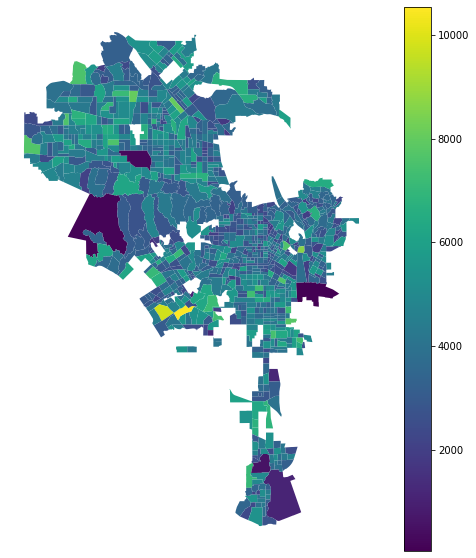

In [424]:
# -- make a choropleth
fig, ax = plt.subplots(figsize=[10, 10])

im = vari.plot("population", legend = 'True', ax=ax)
# ax.set_xlabel("latitude")
# ax.set_ylabel("longtitude")



ax.set_axis_off()
fig.show()

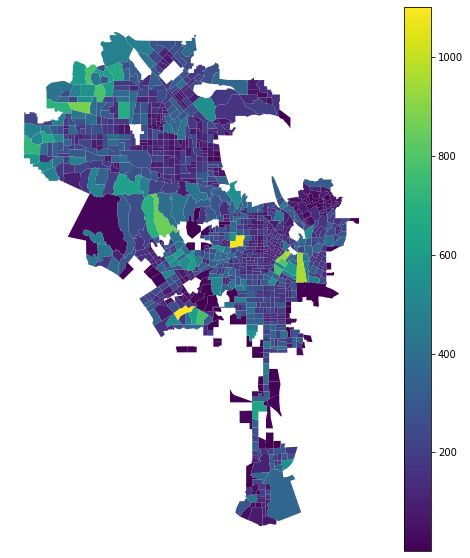

In [466]:

# -- make a choropleth
fig, ax = plt.subplots(figsize=[10, 10])
vari.plot("lightcount", legend=True, ax=ax)
# ax.set_xlabel("latitude")
# ax.set_ylabel("longtitude")

# fig.text(0.93, 0.5, "A coropleth of population[sq ft], Los Angeles", ha="center", 
#      va="center", rotation=-90, fontsize=15)
# fig.show()
ax.set_axis_off()
#plt.title("A coropleth of streetlights[sq ft], Los Angeles");

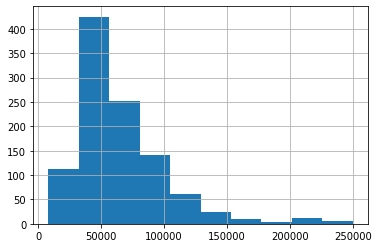

In [426]:
vari["income"].hist()

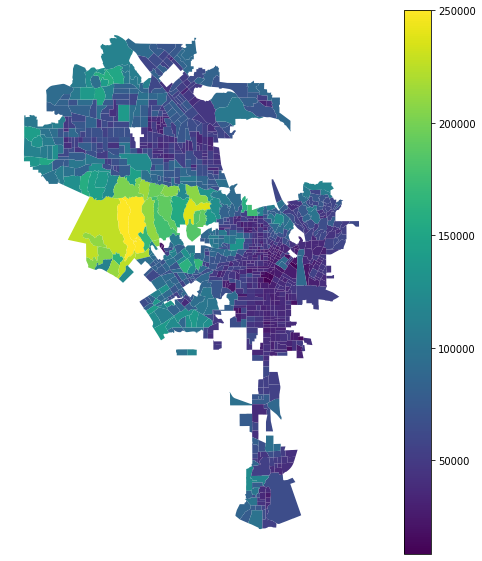

In [427]:
# -- make a choropleth
fig, ax = plt.subplots(figsize=[10, 10])
vari.plot("income", legend=True, ax=ax)
# ax.set_xlabel("latitude")
# ax.set_ylabel("longtitude")
ax.set_axis_off()
# fig.text(0.93, 0.5, "A coropleth of income [sq ft], Los Angeles", ha="center", 
#      va="center", rotation=-90, fontsize=15)
# fig.show()

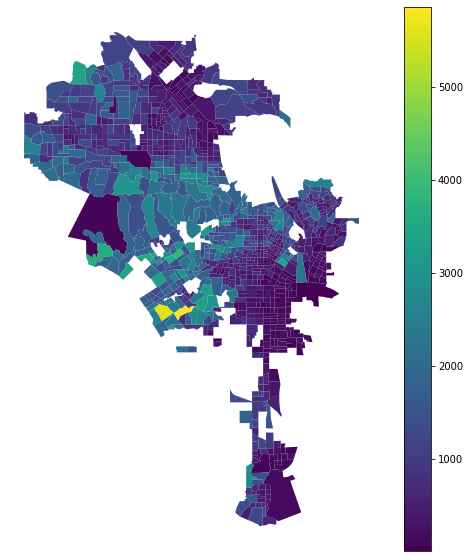

In [428]:
# -- make a choropleth
fig, ax = plt.subplots(figsize=[10, 10])
vari.plot("edu", legend=True, ax=ax)
# ax.set_xlabel("latitude")
# ax.set_ylabel("longtitude")
ax.set_axis_off()
# fig.text(0.93, 0.5, "A coropleth education level[sq ft], Los Angeles", ha="center", 
#      va="center", rotation=-90, fontsize=15)
# fig.show()

In [ ]:
vari.shape

(1047, 9)

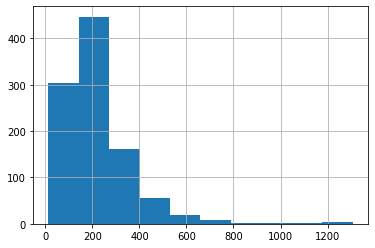

In [ ]:
vari = vari[vari["crimecount"] < 1500]
vari = vari[vari["crimecount"] > 10]
vari["crimecount"].hist()


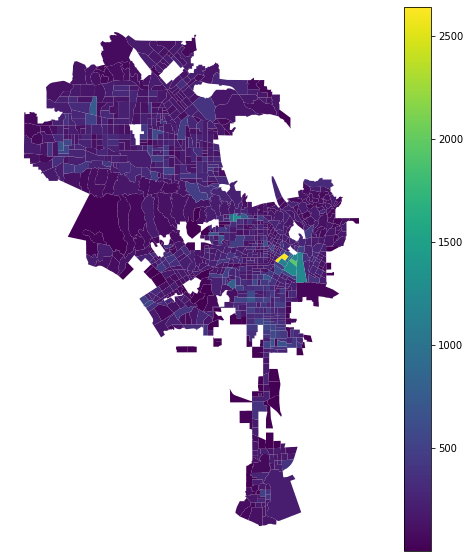

In [429]:
# -- make a choropleth
fig, ax = plt.subplots(figsize=[10, 10])
vari.plot("crimecount", legend=True, ax=ax)
# ax.set_xlabel("latitude")
# ax.set_ylabel("longtitude")

# fig.text(0.93, 0.5, "A coropleth of crimecount[sq ft], Los Angeles", ha="center", 
#      va="center", rotation=-90, fontsize=15)
# fig.show()
ax.set_axis_off()
#plt.title("A coropleth of crimecount[sq ft], Los Angeles");

# Global Moran’s method – spatial relationship in terms of the number of crimes, the number of streetlights;

In [430]:
from libpysal.weights import Queen, Rook

In [431]:
varift = vari.to_crs(epsg=6423)
queens = Queen.from_iterable(varift.dropna(subset=["crimecount"]).geometry)
queens_light = Queen.from_iterable(varift.dropna(subset=["lightcount"]).geometry)

/usr/local/lib/python3.6/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)
/usr/local/lib/python3.6/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)


In [432]:
import pysal.lib as ps

In [433]:
crimec = ps.weights.lag_spatial(queens, varift.crimecount)
crimel = ps.weights.lag_spatial(queens_light, varift.lightcount)
crimec
crimel

array([1014.,  743., 1483., ..., 2119., 1410.,  583.])

In [434]:
ball, aall = np.polyfit(varift.crimecount.values, crimec, 1)
ball_light, aall_light = np.polyfit(varift.lightcount.values, crimel, 1)

In [435]:
ball

2.892990719223204

In [436]:
varift.crimecount.values

array([ 65, 118, 248, ..., 234, 104, 211])

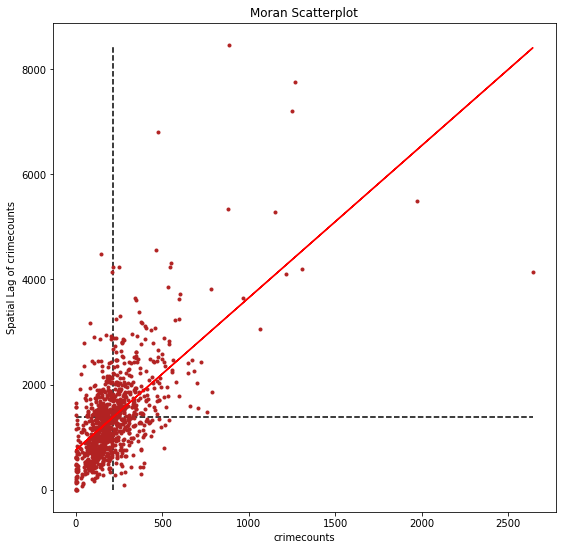

In [437]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(varift.crimecount.values, crimec, 
         '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(varift.crimecount.values.mean(), 
           crimec.min(), 
           crimec.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(crimec.mean(), 
           varift.crimecount.values.min(), 
           varift.crimecount.values.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(varift.crimecount.values, 
         aall + ball * varift.crimecount.values, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of crimecounts')
plt.xlabel('crimecounts');

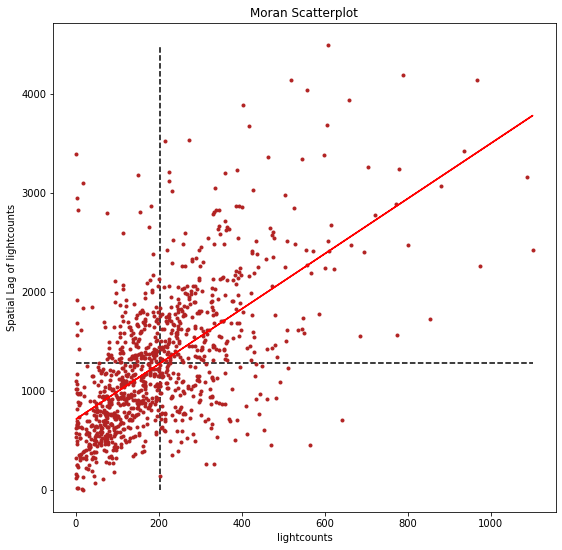

In [438]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(varift.lightcount.values, crimel, 
         '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(varift.lightcount.values.mean(), 
           crimel.min(), 
           crimel.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(crimel.mean(), 
           varift.lightcount.values.min(), 
           varift.lightcount.values.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(varift.lightcount.values , 
         aall_light + ball_light * varift.lightcount.values, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of lightcounts')
plt.xlabel('lightcounts');

In [439]:
from pysal.explore import esda

In [440]:
mi1 = esda.Moran(crimec, queens)
mi1.I

0.6876732550914528

In [441]:
mi1 = esda.Moran(crimel, queens)
mi1.I

0.6410212528294729

In [442]:
LMo = esda.Moran_Local(varift.crimecount.values, queens, permutations=9999)
LMo_light = esda.Moran_Local(varift.lightcount.values, queens_light, permutations=9999)

In [443]:
sig = LMo.p_sim < 0.01
hotspots = LMo.q==1 * sig
coldspots = LMo.q==3 * sig

sig_light = LMo_light.p_sim < 0.01
hotspots_light = LMo_light.q==1 * sig_light
coldspots_light = LMo_light.q==3 * sig_light

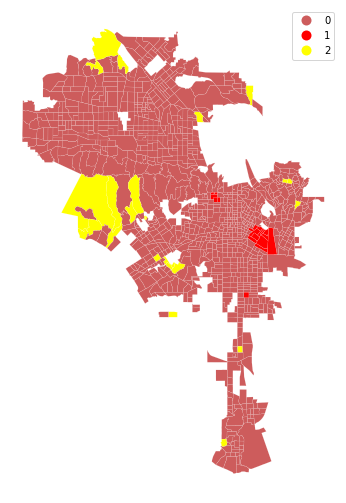

In [444]:
from matplotlib import colors

hcmap = colors.ListedColormap(['Indianred','red','yellow'])
hotcold = hotspots*1 + coldspots*2

f, ax = plt.subplots(figsize=(9, 9))
varift.assign(cl=hotcold).plot(column='cl', categorical=True, 
        k=3, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
#plt.title("Crime Counts Spatial Lag hot-cold spots");

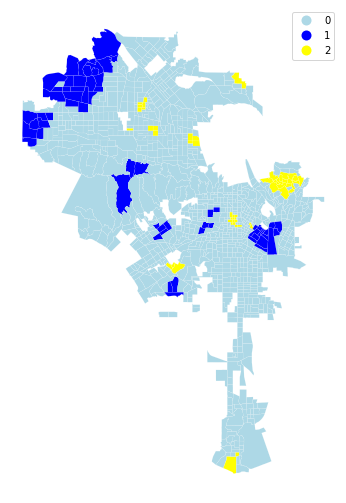

In [445]:
from matplotlib import colors

hcmap = colors.ListedColormap(['lightblue','blue','yellow'])
hotcold_light = hotspots_light*1 + coldspots_light*2

f, ax = plt.subplots(figsize=(9, 9))
varift.assign(cl=hotcold_light).plot(column='cl', categorical=True, 
        k=3, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
#plt.title("Streetlights Counts Spatial Lag hot-cold spots");

# **model fitting**

In [446]:
vari


,edu,GEOID,geometry,logincome,income,population,popdensity,lightcount,crimecount
0,844,06037137504,"POLYGON ((-118.58119 34.14318, -118.58099 34.1...",11.973510,158500,2073,0.000540,167,65
1,2026,06037138000,"POLYGON ((-118.60573 34.14585, -118.60561 34.1...",11.759989,128026,4673,0.001045,99,118
2,1843,06037139200,"POLYGON ((-118.53082 34.18024, -118.52952 34.1...",11.118697,67420,5840,0.005070,363,248
3,1822,06037143200,"POLYGON ((-118.37899 34.15409, -118.37888 34.1...",11.212671,74063,4210,0.004399,236,203
4,2831,06037143300,"POLYGON ((-118.39648 34.15761, -118.39538 34.1...",11.375099,87125,6730,0.004067,316,280
...,...,...,...,...,...,...,...,...,...
1042,1355,06037134424,"POLYGON ((-118.66780 34.20696, -118.66780 34.2...",11.862702,141875,2844,0.000766,477,67
1043,348,06037541002,"POLYGON ((-118.28273 33.88547, -118.28263 33.8...",10.921884,55375,3141,0.000915,10,5
1044,1981,06037189600,"POLYGON ((-118.33698 34.10837, -118.33694 34.1...",11.157806,70109,3787,0.003497,364,234
1045,2025,06037189400,"POLYGON ((-118.32676 34.11112, -118.32674 34.1...",11.980482,159609,3247,0.002244,357,104


In [447]:
test = vari[["crimecount", "lightcount", "edu", "income", "population"]]

In [448]:
test.corr()

,crimecount,lightcount,edu,income,population
crimecount,1.000000,0.414967,0.041722,-0.186273,0.204268
lightcount,0.414967,1.000000,0.286474,0.320632,0.228491
edu,0.041722,0.286474,1.000000,0.611994,0.331402
income,-0.186273,0.320632,0.611994,1.000000,-0.001685
population,0.204268,0.228491,0.331402,-0.001685,1.000000


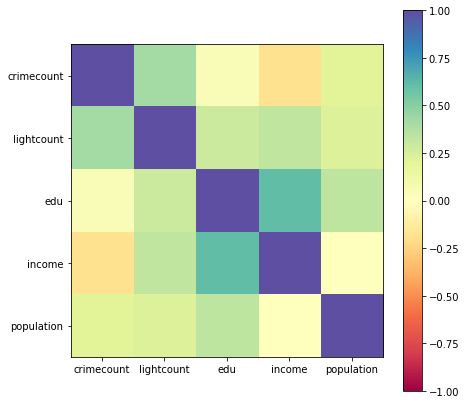

In [449]:
fig, ax = plt.subplots(figsize=[7, 7])
plt.imshow(test.corr(), vmin=-1, vmax=1, cmap = "Spectral")
plt.xticks(range(len(test.corr())), test.corr().columns)
plt.yticks(range(len(test.corr())), test.corr().columns)
plt.colorbar();




In [450]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [451]:
feat = vari[["lightcount", "edu", "income", "population"]]
target = vari["crimecount"]
target = pd.DataFrame(target)

feat_test = vari[["edu", "income", "population"]]


In [452]:
feat_st = (feat - feat.mean()) / feat.std()
feat_st_test = (feat_test - feat_test.mean()) / feat_test.std()

In [453]:
target_st = (target - target.mean()) / target.std()

In [454]:
# splitting the sample into training and test data 
x_train, x_test, y_train, y_test = train_test_split(feat_st, target_st, test_size = 0.25)

In [467]:
model = sm.OLS(target_st, feat_st).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             crimecount   R-squared (uncentered):                   0.306
Model:                            OLS   Adj. R-squared (uncentered):              0.303
Method:                 Least Squares   F-statistic:                              114.9
Date:                Fri, 18 Dec 2020   Prob (F-statistic):                    3.46e-81
Time:                        09:34:54   Log-Likelihood:                         -1294.1
No. Observations:                1047   AIC:                                      2596.
Df Residuals:                    1043   BIC:                                      2616.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lightcount     0.5040      0.028     17.952      0.000       0.449       0.559
edu            0.1569      0.036      4.364      0.000       0.086       0.227
income        -0.4439      0.035    -12.689      0.000      -0.512      -0.375
population     0.0364      0.029      1.249      0.212      -0.021       0.093
==============================================================================
Omnibus:                     1055.091   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90764.915
Skew:                           4.521   Prob(JB):                         0.00
Kurtosis:                      47.708   Cond. No.                         2.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [456]:
from sklearn.metrics import accuracy_score, fowlkes_mallows_score, mean_absolute_error, mean_squared_error, r2_score

# -- predict the TRAINING and TESTING data
# fit a line model
pred_tr = model.predict(x_train)
pred_te = model.predict(x_test)

mae_train = mean_squared_error(y_train, pred_tr) 
mae_test = mean_squared_error(y_test, pred_te) 


print('\n\n\033[1m model Performance \033[0m',
      '\nMean squared Error for Training data: {0:.2}'.format(mae_train),
       '\nMean squared Error for Test data: {0:.2}'.format(mae_test))



 model Performance  
Mean squared Error for Training data: 0.74 
Mean squared Error for Test data: 0.54


Text(0, 0.5, 'The Number of crimes_pred')

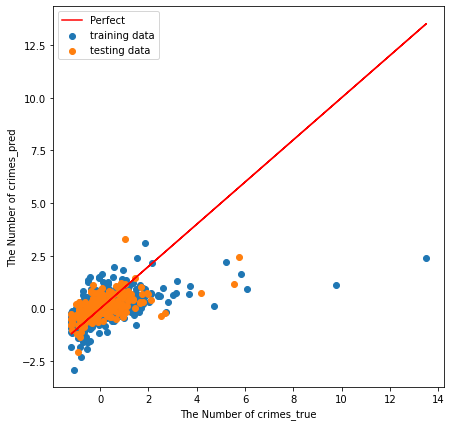

In [457]:
# plot the prediction results and raw data
fig, ax = plt.subplots(figsize=[7, 7])
ax.scatter(y_train, pred_tr, label = "training data")
ax.scatter(y_test, pred_te, label = "testing data")
ax.plot(y_train, y_train, 'r', label='Perfect')
leg = ax.legend();
plt.xlabel('The Number of crimes_true')
plt.ylabel('The Number of crimes_pred')


In [458]:
from sklearn.ensemble import RandomForestRegressor

from sklearn import tree
import graphviz

In [459]:
# splitting the sample into training and test data 
x_train, x_test, y_train, y_test = train_test_split(feat_st, target_st, test_size = 0.25)

In [460]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(feat_st_test, target_st, test_size = 0.25)

In [461]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42, max_depth=5)
rf2 = RandomForestRegressor(n_estimators = 100, random_state = 42, max_depth=5)

In [462]:
# Train the model on training data
rf.fit(x_train, y_train);
rf2.fit(x_train2, y_train2);

# Use the forest's predict method on the train and tesst data
rf_pred_tr = rf.predict(x_train)
rf_pred_te = rf.predict(x_test)

rf_pred_tr2 = rf2.predict(x_train2)
rf_pred_te2 = rf2.predict(x_test2)

rf_mae_train = mean_squared_error(y_train, rf_pred_tr) 
rf_mae_test = mean_squared_error(y_test, rf_pred_te) 

rf_mae_train2 = mean_squared_error(y_train2, rf_pred_tr2) 
rf_mae_test2 = mean_squared_error(y_test2, rf_pred_te2) 

print('\n\n\033[1m Polynomial of second degree model Performance \033[0m',
      '\nMean Absolute Error for Training data: {0:.2}'.format(rf_mae_train),
       '\nMean Absolute Error for Test data: {0:.2}'.format(rf_mae_test))


print('\n\n\033[1m Polynomial of second degree model Performance \033[0m',
      '\nMean Absolute Error for Training data: {0:.2}'.format(rf_mae_train2),
       '\nMean Absolute Error for Test data: {0:.2}'.format(rf_mae_test2))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until




 Polynomial of second degree model Performance  
Mean Absolute Error for Training data: 0.33 
Mean Absolute Error for Test data: 1.2


 Polynomial of second degree model Performance  
Mean Absolute Error for Training data: 0.49 
Mean Absolute Error for Test data: 0.62


Text(0.5, 1.0, 'Real and Prediction Crimes With Lights')

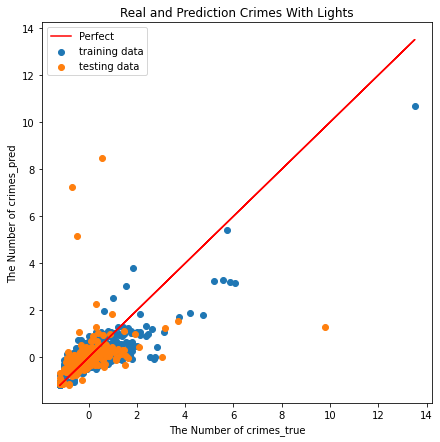

In [463]:
# plot the prediction results and raw data
fig, ax = plt.subplots(figsize=[7, 7])
ax.scatter(y_train, rf_pred_tr, label = "training data")
ax.scatter(y_test, rf_pred_te, label = "testing data")
ax.plot(y_train, y_train, 'r', label='Perfect')

leg = ax.legend();
plt.xlabel('The Number of crimes_true')
plt.ylabel('The Number of crimes_pred')
plt.title("Real and Prediction Crimes With Lights")

Text(0.5, 1.0, 'Real and Prediction Crimes Without Lights')

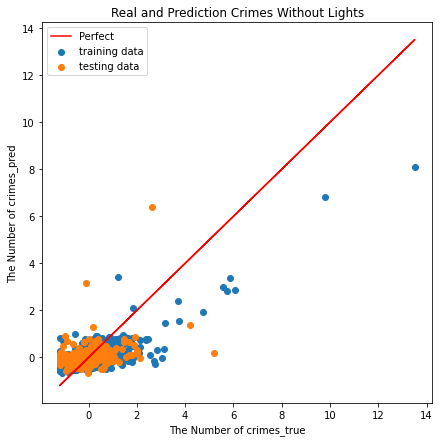

In [464]:
# plot the prediction results and raw data
fig, ax = plt.subplots(figsize=[7, 7])
ax.scatter(y_train2, rf_pred_tr2, label = "training data")
ax.scatter(y_test2, rf_pred_te2, label = "testing data")
ax.plot(y_train, y_train, 'r', label='Perfect')
leg = ax.legend();
plt.xlabel('The Number of crimes_true')
plt.ylabel('The Number of crimes_pred')
plt.title("Real and Prediction Crimes Without Lights")

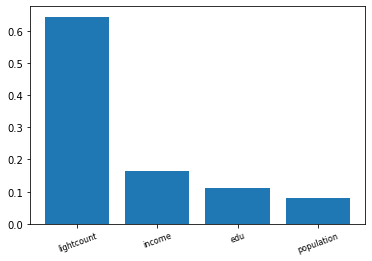

In [468]:
# Calculate feature importances
importances = rf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feat.columns[i] for i in indices]

# Barplot: Add bars
plt.bar(range(feat_st.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(feat_st.shape[1]), names, rotation=20, fontsize = 8)
# Create plot title
#plt.title("Feature Importance")
# Show plot
plt.show()